In [ ]:
import numpy as np
import pandas as pd
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
data=pd.read_csv('ptbxl_database.csv')
data.scp_codes = data.scp_codes.apply(lambda x: ast.literal_eval(x))

In [ ]:
data.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [ ]:
data.shape

(21799, 28)

In [ ]:
data.describe()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,validated_by,strat_fold
count,21799.000000,21799.000000,21799.000000,21799.000000,6974.000000,9421.000000,20326.000000,21782.000000,12421.000000,21799.000000
mean,10926.658379,11250.156521,62.769301,0.479150,166.702323,70.995223,2.291745,1.544945,0.746075,5.503005
std,6302.393366,6235.026404,32.308813,0.499577,10.867321,15.878803,3.254033,4.172883,1.178003,2.874948
min,1.000000,302.000000,2.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,5469.500000,5974.500000,50.000000,0.000000,160.000000,60.000000,0.000000,0.000000,0.000000,3.000000
50%,10926.000000,11419.000000,62.000000,0.000000,166.000000,70.000000,1.000000,1.000000,1.000000,6.000000
75%,16386.500000,16607.500000,72.000000,1.000000,174.000000,80.000000,3.000000,2.000000,1.000000,8.000000
max,21837.000000,21797.000000,300.000000,1.000000,209.000000,250.000000,11.000000,50.000000,11.000000,10.000000


In [ ]:
data.scp_codes

In [ ]:
def importclassNORM(col):
  if "NORM" in col :
    return 0
  else:
    return 1

In [ ]:
data["Target"]=data["scp_codes"].apply(importclassNORM)

In [ ]:
data.groupby("Target").agg({"Target":"count"})

,Target
Target,
0,9514
1,12285


In [ ]:
data.describe()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,validated_by,strat_fold,Target
count,21799.000000,21799.000000,21799.000000,21799.000000,6974.000000,9421.000000,20326.000000,21782.000000,12421.000000,21799.000000,21799.000000
mean,10926.658379,11250.156521,62.769301,0.479150,166.702323,70.995223,2.291745,1.544945,0.746075,5.503005,0.563558
std,6302.393366,6235.026404,32.308813,0.499577,10.867321,15.878803,3.254033,4.172883,1.178003,2.874948,0.495955
min,1.000000,302.000000,2.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5469.500000,5974.500000,50.000000,0.000000,160.000000,60.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,10926.000000,11419.000000,62.000000,0.000000,166.000000,70.000000,1.000000,1.000000,1.000000,6.000000,1.000000
75%,16386.500000,16607.500000,72.000000,1.000000,174.000000,80.000000,3.000000,2.000000,1.000000,8.000000,1.000000
max,21837.000000,21797.000000,300.000000,1.000000,209.000000,250.000000,11.000000,50.000000,11.000000,10.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21799 entries, 0 to 21798
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecg_id                        21799 non-null  int64  
 1   patient_id                    21799 non-null  float64
 2   age                           21799 non-null  float64
 3   sex                           21799 non-null  int64  
 4   height                        6974 non-null   float64
 5   weight                        9421 non-null   float64
 6   nurse                         20326 non-null  float64
 7   site                          21782 non-null  float64
 8   device                        21799 non-null  object 
 9   recording_date                21799 non-null  object 
 10  report                        21799 non-null  object 
 11  scp_codes                     21799 non-null  object 
 12  heart_axis                    13331 non-null  object 
 13  i

In [ ]:
data.isnull().sum()

ecg_id                              0
patient_id                          0
age                                 0
sex                                 0
height                          14825
weight                          12378
nurse                            1473
site                               17
device                              0
recording_date                      0
report                              0
scp_codes                           0
heart_axis                       8468
infarction_stadium1             16187
infarction_stadium2             21696
validated_by                     9378
second_opinion                      0
initial_autogenerated_report        0
validated_by_human                  0
baseline_drift                  20201
static_noise                    18539
burst_noise                     21186
electrodes_problems             21769
extra_beats                     19850
pacemaker                       21508
strat_fold                          0
filename_lr 

<ipython-input-14-afbd38167c92>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


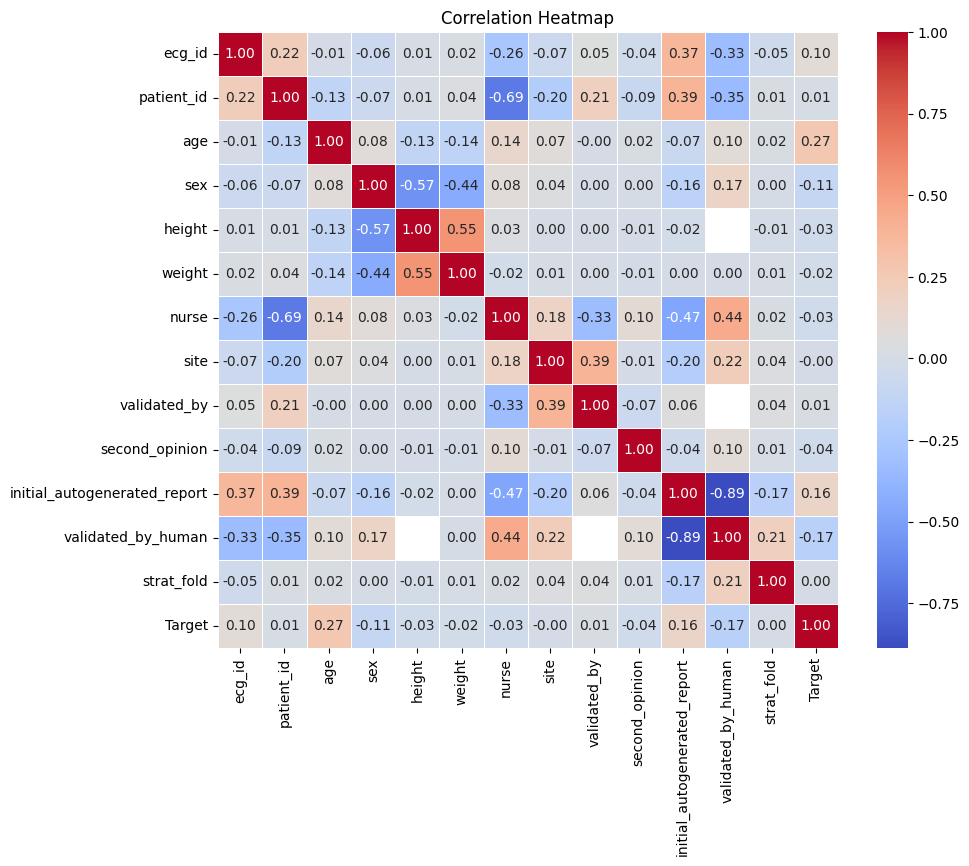

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
X = pd.DataFrame(index=data.index)
X['age']=data['age']
X['sex'] = data['sex']
X['height'] = data.groupby('sex')['height'].transform(lambda x: x.fillna(x.mean()))

X['weight'] = data.groupby('sex')['weight'].transform(lambda x: x.fillna(x.mean()))

X['infarction_stadium1'] = data['infarction_stadium1'].replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium I-II': 2,
    'Stadium II': 3,
    'Stadium II-III': 4,
    'Stadium III': 5
}).fillna(0)

X['infarction_stadium2'] = data['infarction_stadium2'].replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium II': 2,
    'Stadium III': 3
}).fillna(0)

# 0 represents unknown
X['heart_axis'] = data.heart_axis.replace({
    'LAD': 1,
    'ALAD': 2,
    'RAD': 3,
    'AXR': 4,
    'MID': 5,
    'ARAD': 6,
    'AXL': 7,
    'SAG': 8
}).fillna(0)

X['pacemaker'] = (data.pacemaker == 'ja, pacemaker').astype(float)


X

,age,sex,height,weight,infarction_stadium1,infarction_stadium2,heart_axis,pacemaker
0,56.0,1,160.988381,63.000000,0.0,0.0,0.0,0.0
1,19.0,0,173.491999,70.000000,0.0,0.0,0.0,0.0
2,37.0,1,160.988381,69.000000,0.0,0.0,0.0,0.0
3,24.0,0,173.491999,82.000000,0.0,0.0,0.0,0.0
4,19.0,1,160.988381,70.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
21794,67.0,1,160.988381,64.557461,0.0,0.0,1.0,0.0
21795,300.0,0,173.491999,78.506440,4.0,0.0,5.0,0.0
21796,59.0,1,160.988381,64.557461,0.0,0.0,5.0,0.0
21797,64.0,1,160.988381,64.557461,0.0,0.0,1.0,0.0


In [ ]:
y=data.Target
y

0        0
1        0
2        0
3        0
4        0
        ..
21794    1
21795    0
21796    1
21797    0
21798    0
Name: Target, Length: 21799, dtype: int64

Over Sampling using SMOTE (Synthetic Minority Over-sampling Technique )

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
y_resampled.shape

(24570,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=5)

In [ ]:
# Scaling X
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = pd.DataFrame(X_scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [ ]:
X_train_scaled

,age,sex,height,weight,infarction_stadium1,infarction_stadium2,heart_axis,pacemaker
2205,0.519056,-0.964705,1.557002,-0.579096,-0.300676,-0.062728,-0.957694,9.362682
14449,0.328073,-0.964705,1.928126,0.863653,-0.300676,-0.062728,-0.957694,-0.106873
460,-0.117553,-0.964705,1.062170,-0.154758,-0.300676,-0.062728,-0.957694,-0.106873
23438,-0.244874,-0.964705,0.751909,0.567163,-0.300676,-0.062728,1.243266,-0.106873
17032,0.200752,-0.964705,0.751909,0.567163,-0.300676,-0.062728,1.243266,-0.106873
...,...,...,...,...,...,...,...,...
23670,0.105260,1.036587,-0.794890,-0.616654,-0.300676,-0.062728,1.243266,-0.106873
3046,-0.022061,1.036587,-0.669744,1.542594,-0.300676,-0.062728,-0.957694,-0.106873
20463,0.328073,1.036587,-0.794890,-0.616654,-0.300676,-0.062728,-0.517502,-0.106873
18638,7.585412,-0.964705,0.751909,0.567163,-0.300676,-0.062728,1.243266,-0.106873


Created Model using SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)
y_pred1 = svm_model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Accuracy: 0.7205942205942206
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74      2501
           1       0.73      0.68      0.70      2413

    accuracy                           0.72      4914
   macro avg       0.72      0.72      0.72      4914
weighted avg       0.72      0.72      0.72      4914



Creating Model using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
model_2 = DecisionTreeClassifier(random_state=42)

# Train the model
model_2.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred2 = model_2.predict(X_test_scaled)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred2))



Accuracy: 0.712047212047212
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71      2501
           1       0.70      0.73      0.71      2413

    accuracy                           0.71      4914
   macro avg       0.71      0.71      0.71      4914
weighted avg       0.71      0.71      0.71      4914



creating different model using

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest model
model_3 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_3.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred3 = model_3.predict(X_test_scaled)

# Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy3}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred3))

Accuracy: 0.7236467236467237
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      2501
           1       0.71      0.74      0.72      2413

    accuracy                           0.72      4914
   macro avg       0.72      0.72      0.72      4914
weighted avg       0.72      0.72      0.72      4914



logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred4 = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy4 = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy4}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred4))


Accuracy: 0.6994301994301995
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      2501
           1       0.70      0.68      0.69      2413

    accuracy                           0.70      4914
   macro avg       0.70      0.70      0.70      4914
weighted avg       0.70      0.70      0.70      4914



Comparing the accuracies of the models

In [ ]:
print(f"SVM Accuracy: {accuracy}")
print(f"Decision Tree Accuracy: {accuracy2}")
print(f"Random Forest Accuracy: {accuracy3}")
print(f"Logistic Regression Accuracy: {accuracy4}")

SVM Accuracy: 0.7205942205942206
Decision Tree Accuracy: 0.712047212047212
Random Forest Accuracy: 0.7236467236467237
Logistic Regression Accuracy: 0.6994301994301995
